In [1]:
#Import tenserflow
import os
import glob
import cv2
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import segmentation_models as sm


2022-05-24 05:29:01.582038: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ammar/.programs/py3.9/lib64/python3.10/site-packages/cv2/../../lib64:
2022-05-24 05:29:01.582066: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Segmentation Models: using `keras` framework.


# First Model (CNN)


In [2]:
# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D
from keras.utils import np_utils
#Import tenserflow
import os
import glob
import cv2
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import segmentation_models as sm
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten


In [3]:
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

In [4]:
#Resizing images 
SIZE_X = 256 #Resize images (height  = X, width = Y)
SIZE_Y = 256

In [5]:
#Create training and test array
train_images = []

for directory_path in glob.glob("simages"):
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        #print(img_path)
        img = cv2.imread(img_path)       
        img = cv2.resize(img, (SIZE_Y, SIZE_X))
       # img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        #train_labels.append(label)
#Convert list to array for machine learning processing        
train_images = np.array(train_images)

In [6]:
train_masks = []

for directory_path in glob.glob("slabels"):
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        #print(img_path)
        mask = cv2.imread(img_path)       
        mask = cv2.resize(mask, (SIZE_Y, SIZE_X))
        train_masks.append(mask)
        #train_labels.append(label)
#Convert list to array for machine learning processing        
train_masks = np.array(train_masks)

<function matplotlib.pyplot.show(close=None, block=None)>

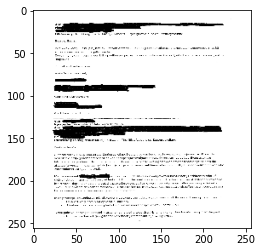

In [18]:
# print out images of each array to make sure they match
import cv2
from matplotlib import pyplot as plt

plt.imshow(train_images[17])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

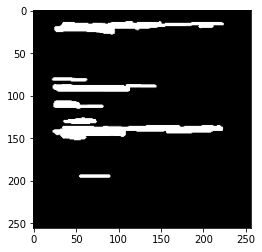

In [19]:
plt.imshow(train_masks[17])
plt.show

In [28]:
#Use customary x_train and y_train variables
X = train_images
Y = train_masks
#Y = np.expand_dims(Y, axis=3) #May not be necessary..

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# preprocess input
x_train = preprocess_input(x_train)
x_val = preprocess_input(x_val)

In [29]:
# building a linear stack of layers with the sequential model
model = Sequential()
# hidden layer
model.add(Dense(100, input_shape=(256, 256, 3), activation='relu'))
# output layer
model.add(Dense(3, activation='softmax'))

In [39]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# training the model for 10 epochs      batch_size=128
model.fit(x_train, y_train, batch_size=70, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 168.6929 - accuracy: 0.9929 - val_loss: 79.3578 - val_accuracy: 0.9974
Epoch 2/10
1/1 [==============================] - 3s 3s/step - loss: 174.4000 - accuracy: 0.9941 - val_loss: 81.5850 - val_accuracy: 0.9975
Epoch 3/10
1/1 [==============================] - 3s 3s/step - loss: 178.6720 - accuracy: 0.9948 - val_loss: 83.2882 - val_accuracy: 0.9975
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 182.0094 - accuracy: 0.9949 - val_loss: 84.8573 - val_accuracy: 0.9975
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 185.0635 - accuracy: 0.9948 - val_loss: 86.2526 - val_accuracy: 0.9974
Epoch 6/10
1/1 [==============================] - 3s 3s/step - loss: 187.7651 - accuracy: 0.9947 - val_loss: 86.7183 - val_accuracy: 0.9974
Epoch 7/10
1/1 [==============================] - 3s 3s/step - loss: 188.7040 - accuracy: 0.9947 - val_loss: 86.8040 - val_accuracy: 0.9974
Epoch 8/10
1/1 [====

In [44]:
# testing on different images
test_img = cv2.imread('45.png')       
test_img = cv2.resize(test_img, (SIZE_Y, SIZE_X))
#test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
test_img = np.expand_dims(test_img, axis=0)
#test_img = preprocess_input(test_img)

In [45]:
prediction = model.predict(test_img)
#X_test_feature = X_test_feature.reshape(-1, X_test_feature.shape[3])


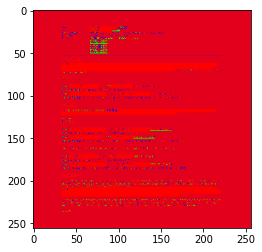

In [46]:
#View and Save segmented image
prediction_image = prediction.reshape(mask.shape)
plt.imshow(prediction_image, cmap='gray')



In [53]:
# ground truth
truth = cv2.imread('truth.png', 0).reshape(-1)

In [ ]:
#Using built in keras function
from keras.metrics import MeanIoU
num_classes = 1
IOU_keras = MeanIoU(num_classes=num_classes)  
IOU_keras.update_state(truth, prediction)
print("Mean IoU =", IOU_keras.result().numpy())